# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

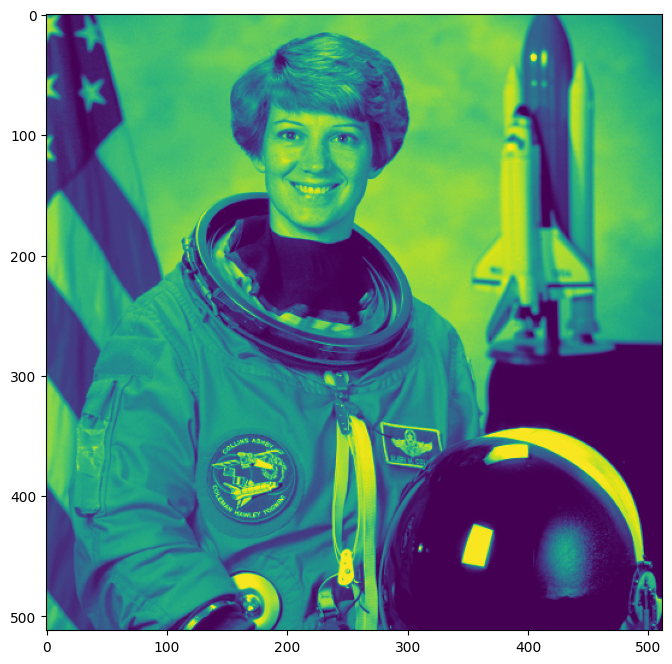

In [2]:
astronaut_ori = plt.imread('data/astronaut.png')
plt.figure(figsize=(15,8))
plt.imshow(astronaut_ori)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [20]:
def meanfilter(img, size):
    result = np.zeros(img.shape)
    n = (size - 1) // 2                 # image border
    img_mean_copy = img.copy()
    for p in np.ndindex(img.shape):      # any pixel in image
        neighborhood_sum = 0
        y, x = p        # pixel extraction
        if n <= p[0] < img.shape[0]-n and n <= p[1] < img.shape[1]-n:
            
            for q in np.ndindex(size, size):     # pixel in neighborhood
                qy = y + q[0] - n               # rows within neighborhood = p + row? - n (half image border) -> q[] von 0 bis 2
                qx = x + q[1] - n
                neighborhood_sum += img_mean_copy[qy,qx]

                    # sum all neighborhood cells form -n to n
        
            neighborhood_mean = neighborhood_sum / (size**2)    # divide by size**2
            result[y,x] = neighborhood_mean
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

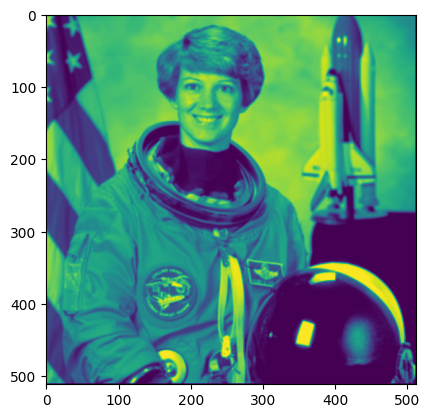

In [21]:
filtered_img = meanfilter(astronaut_ori,3)
plt.imshow(filtered_img)


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

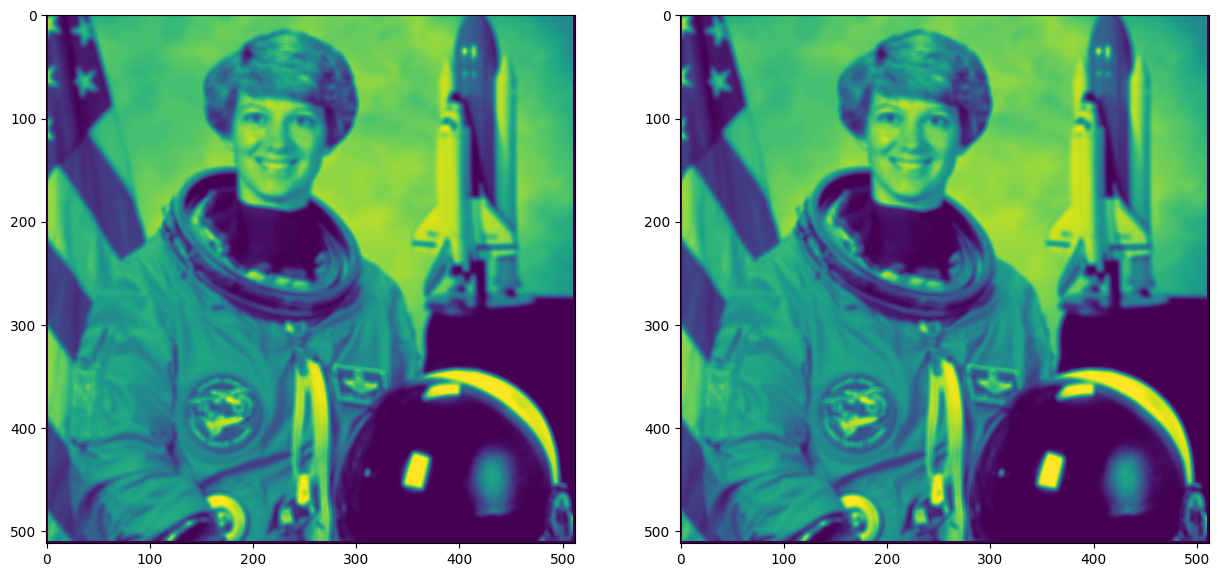

In [22]:
filtered_img = meanfilter(astronaut_ori,5)
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
plt.imshow(filtered_img)

plt.subplot(1,2,2)
astr5 = plt.imread('data/astronaut_meanfilter5.png')
plt.imshow(astr5)

assert np.allclose(filtered_img, astr5, atol=1/255)
# randpixel erhalten?? if bed falsch oder eher -n oder so?

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [7]:
def medianfilter(img, size):
    result = np.zeros(img.shape)
    n = (size - 1) // 2               # image border
    img_med_copy = img.copy()
    
    for p in np.ndindex(img.shape):      # any pixel in image
        neighborhood = []
        y, x = p                     # pixel extraction
        
        for q in np.ndindex(size, size):     # pixel in neighborhood
            qy = y + q[0] - n
            qx = x + q[1] - n

            if 0 <= qy < img.shape[0] and 0 <= qx < img.shape[1]:
                neighborhood.append (img_med_copy[qy,qx])        # sum all neighborhood cells form -n to n
                neighborhood_median = np.median(neighborhood)
        
        result[p] = neighborhood_median
    return result

    # data sort?
    # assert falsch

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

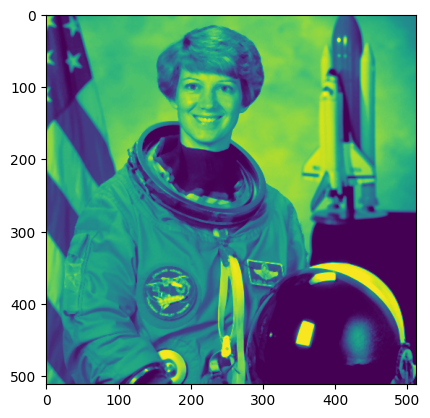

In [8]:
filtered_mean = medianfilter(astronaut_ori, 3)
plt.imshow(filtered_mean)

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [6]:
filtered_median5 = medianfilter(astronaut_ori,5)
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
plt.imshow(filtered_median5)

plt.subplot(1,2,2)
astr5median = plt.imread('data/astronaut_medianfilter5.png')
plt.imshow(astr5median)

assert np.allclose(filtered_median5 == astr5median, atol=1/255)

NameError: name 'medianfilter' is not defined

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [ ]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

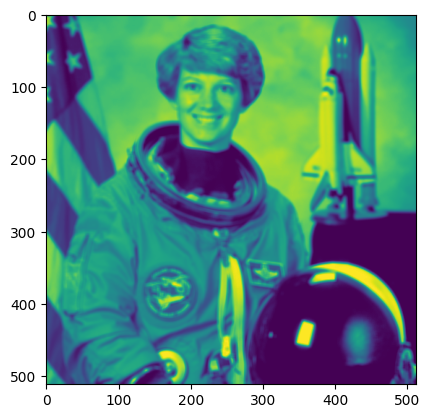

In [64]:
aut_filter_mean = scipy.ndimage.uniform_filter(astronaut_ori, 5)
plt.imshow(aut_filter_mean)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

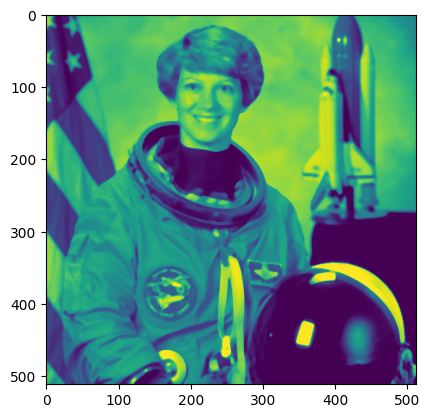

In [65]:
aut_filter_median = scipy.ndimage.median_filter(astronaut_ori, 5)
plt.imshow(aut_filter_median)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

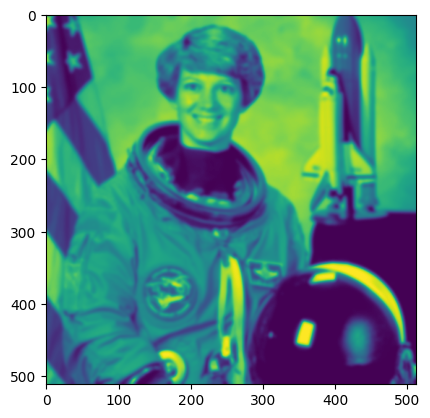

In [67]:
aut_filter_gauss = scipy.ndimage.gaussian_filter(astronaut_ori, 2)
plt.imshow(aut_filter_gauss)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [ ]:
# what am i supposed to dooo

Main Differences:

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
   result = img.mean()
   return result # write your code here
%timeit fastfilter()

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: